In [1]:
using Plots, Catalyst, GraphViz, DifferentialEquations

In [2]:
# define reaction network
rn = @reaction_network begin
    α_1, X --> ∅
    α_2, Y --> ∅
    β_0 * S, ∅ --> X
    -β_1 * Y, ∅ --> X
    β_2 * X, ∅ --> Y
end α_1 α_2 β_0 β_1 β_2

Model ##ReactionSystem#291 with 5 equations
States (3):
  X(t)
  Y(t)
  S(t)
Parameters (5):
  α_1
  α_2
  β_0
  β_1
  β_2

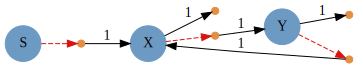

In [9]:
Graph(rn)

In [3]:
convert(ODESystem, rn)

Model ##ReactionSystem#291 with 3 equations
States (3):
  X(t)
  Y(t)
  S(t)
Parameters (5):
  α_1
  α_2
  β_0
  β_1
  β_2

In [4]:
# nominal parameters
p = (:α_1 => 0.1,  :α_2 => 0.2, :β_0 => 0.2, :β_1 => 0.6, :β_2 => 0.6)

(:α_1 => 0.1, :α_2 => 0.2, :β_0 => 0.2, :β_1 => 0.6, :β_2 => 0.6)

In [5]:
# experiment timespan
tspan = (0.0, 50.0)

(0.0, 50.0)

In [6]:
# initial conditions
u0 = [:X => 1.0, :Y => 0.0, :S => 0.5]

3-element Vector{Pair{Symbol, Float64}}:
 :X => 1.0
 :Y => 0.0
 :S => 0.5

In [7]:
# solve ODE
problem = ODEProblem(rn, u0, tspan, p)
sol = solve(problem, Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 38-element Vector{Float64}:
  0.0
  0.0023534932453251525
  0.025888425698576675
  0.17504598822720996
  0.5090060252084174
  0.9985279210844356
  1.6100697587445145
  2.3442684233731184
  3.16534673838842
  4.047127056065658
  5.05916276885379
  6.169356447058938
  7.275847170373474
  ⋮
 26.935828339316675
 28.9117993916505
 30.629236383672296
 32.62964292595351
 34.84100047653805
 36.875523169582216
 39.23878164808712
 41.636601554405075
 44.09356755935177
 47.058596598895825
 49.70284394838032
 50.0
u: 38-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.5]
 [0.9999990032272964, 0.0014117631943529588, 0.5]
 [0.9998796763541408, 0.015492289497266564, 0.5]
 [0.9945851314936415, 0.10302158441246086, 0.5]
 [0.9560091157483432, 0.28593767336099907, 0.5]
 [0.8421576307394718, 0.5119855582212004, 0.5]
 [0.6309612827887969, 0.7083882070193777, 0.5]
 [0.32964133584196287, 0.8076411595715475, 0.5]
 [0.00650042989964380

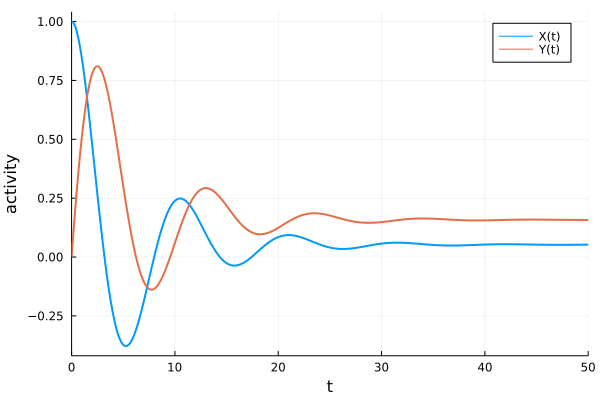

In [8]:
plot(sol, vars=[(1), (2)], linewidth=2)
ylabel!("activity")